# Predict Your Study Productivity
---

## SetUp del proyecto (No editar)

In [1]:
# Lista de librerías necesarias
required_packages = [
    "pandas",
    "numpy",
    "scikit-learn",
    "matplotlib",
    "joblib"
]

import importlib
import subprocess
import sys

def install_if_missing(package):
    try:
        importlib.import_module(package.replace("-", "_"))
        print(f"- {package} ya está instalado.")
    except ImportError:
        print(f"Instalando {package}...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])
        print(f"- {package} instalado correctamente.")

# Instalar todas las dependencias
for pkg in required_packages:
    install_if_missing(pkg)

print("\n Setup completado. Ya puedes continuar con el notebook.")

- pandas ya está instalado.
- numpy ya está instalado.
Instalando scikit-learn...
- scikit-learn instalado correctamente.
- matplotlib ya está instalado.
- joblib ya está instalado.

 Setup completado. Ya puedes continuar con el notebook.


---
## Importar librerías y configuración general

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    mean_absolute_error,
    accuracy_score,
    classification_report
)
from sklearn.linear_model import LogisticRegression

plt.style.use("ggplot")

---
## Carga del dataset

In [19]:
df = pd.read_csv("../data/productividad_estudio.csv")

print("Primeras filas del dataset:")
df.head()

Primeras filas del dataset:


,horas_sueño,tiempo_estudio,distracción,energía,dificultad,uso_móvil,ruido_ambiente,descanso_previo,estado_ánimo,productividad_final,productividad_clase
0,7,120,3,4,3,15,2,si,4,4,NaN
1,6,90,5,3,4,20,5,no,3,3,NaN
2,8,150,2,5,2,5,1,si,5,5,NaN
3,5,60,6,2,4,30,7,no,2,2,NaN
4,7,180,1,4,3,10,3,si,4,5,NaN


---
## Preprocesamiento de los datos

In [20]:
# Convertir categóricas a numérico
print(df.columns)
if "descanso_previo" in df.columns:
    df["descanso_previo"] = df["descanso_previo"].map({"si": 1, "no": 0})

# Crear variable de clasificación si existe la columna principal
if "productividad_final" in df.columns and df.shape[0] > 0:
    def clasificar(x):
        if x <= 2: return "bajo"
        elif x == 3: return "medio"
        else: return "alto"
    df["productividad_clase"] = df["productividad_final"].apply(clasificar)

df.head()

Index(['horas_sueño', 'tiempo_estudio', 'distracción', 'energía', 'dificultad',
       'uso_móvil', 'ruido_ambiente', 'descanso_previo', 'estado_ánimo',
       'productividad_final', 'productividad_clase'],
      dtype='object')


,horas_sueño,tiempo_estudio,distracción,energía,dificultad,uso_móvil,ruido_ambiente,descanso_previo,estado_ánimo,productividad_final,productividad_clase
0,7,120,3,4,3,15,2,1,4,4,alto
1,6,90,5,3,4,20,5,0,3,3,medio
2,8,150,2,5,2,5,1,1,5,5,alto
3,5,60,6,2,4,30,7,0,2,2,bajo
4,7,180,1,4,3,10,3,1,4,5,alto


---
## Análisis Exploratorio

Descripción estadística:


,horas_sueño,tiempo_estudio,distracción,energía,dificultad,uso_móvil,ruido_ambiente,descanso_previo,estado_ánimo,productividad_final
count,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000
mean,6.305085,116.745763,3.779661,3.305085,3.322034,18.016949,4.203390,0.474576,3.372881,3.389831
std,1.262923,48.769547,2.034765,1.262923,0.918032,9.698012,2.339906,0.503640,1.158154,1.339286
min,4.000000,45.000000,1.000000,1.000000,2.000000,5.000000,0.000000,0.000000,1.000000,1.000000
25%,5.000000,70.000000,2.000000,2.000000,3.000000,10.000000,3.000000,0.000000,2.000000,2.000000
50%,6.000000,108.000000,4.000000,3.000000,3.000000,19.000000,4.000000,0.000000,3.000000,3.000000
75%,7.000000,159.000000,6.000000,4.000000,4.000000,26.000000,6.000000,1.000000,4.000000,5.000000
max,8.000000,200.000000,7.000000,5.000000,5.000000,35.000000,8.000000,1.000000,5.000000,5.000000


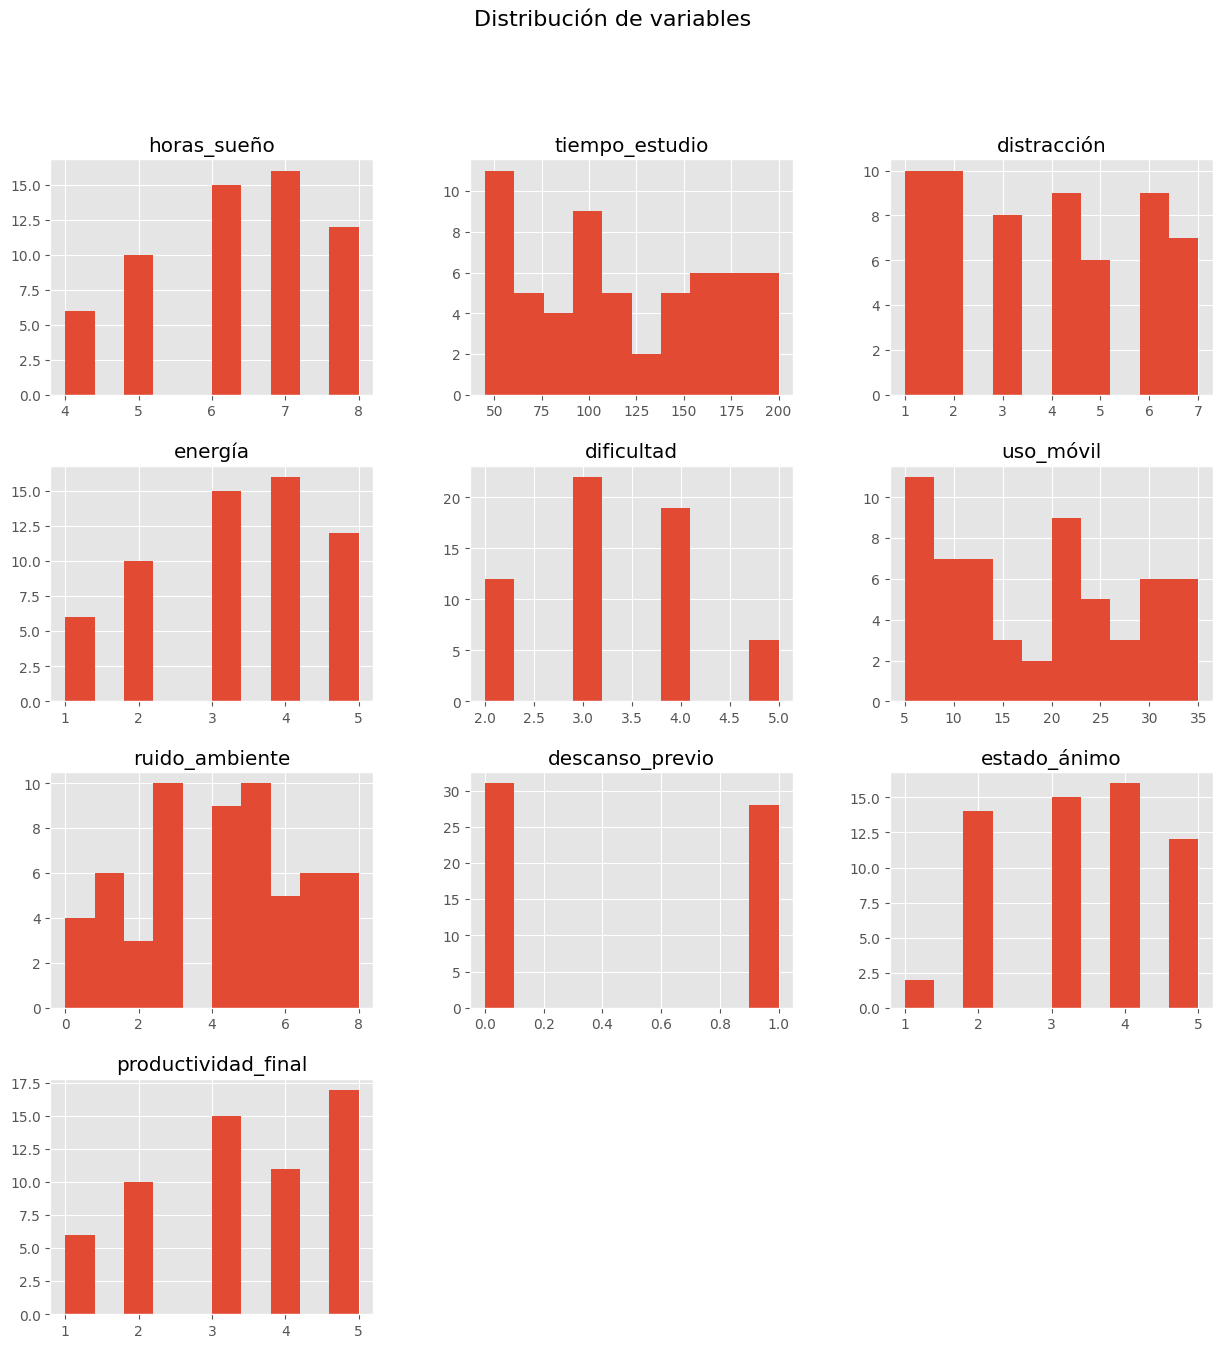

In [21]:
print("Descripción estadística:")
display(df.describe())

# Histograma general
df.hist(figsize=(15, 15))
plt.suptitle("Distribución de variables", fontsize=16)
plt.show()

---
## Modelo de Regresión

MAE (Regresión): 0.062


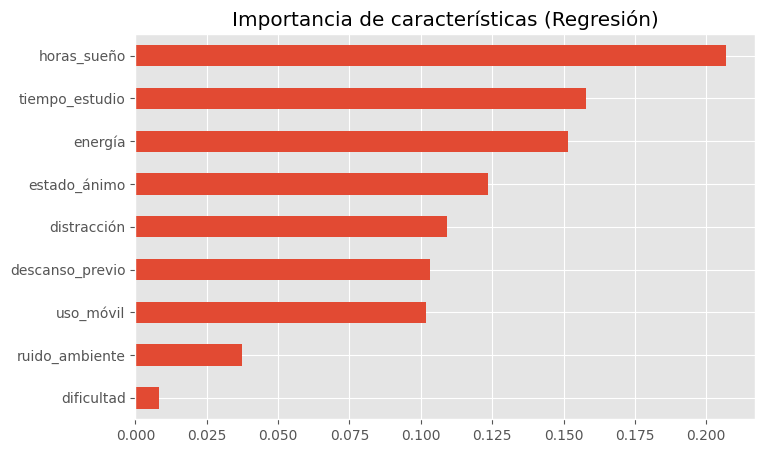

In [23]:
if df.shape[0] > 5:

    features = [
        "horas_sueño", "tiempo_estudio", "distracción", "energía",
        "dificultad", "uso_móvil", "ruido_ambiente",
        "descanso_previo", "estado_ánimo"
    ]

    X = df[features]
    y = df["productividad_final"]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    model_reg = RandomForestRegressor(random_state=42)
    model_reg.fit(X_train, y_train)

    preds = model_reg.predict(X_test)
    mae = mean_absolute_error(y_test, preds)

    print(f"MAE (Regresión): {mae:.3f}")

    # Importancia de variables
    importancias = pd.Series(model_reg.feature_importances_, index=features)
    importancias.sort_values().plot(kind="barh", figsize=(8, 5))
    plt.title("Importancia de características (Regresión)")
    plt.show()

else:
    print("No hay suficientes datos para entrenar el modelo de regresión.")

---
## Modelo de Clasificación

In [ ]:
if df.shape[0] > 5:

    features = [
        "horas_sueño", "tiempo_estudio", "distracción", "energía",
        "dificultad", "uso_móvil", "ruido_ambiente",
        "descanso_previo", "estado_ánimo"
    ]

    X = df[features]
    y = df["productividad_clase"]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=16, stratify=y)

    model_clf = LogisticRegression(random_state=16)
    model_clf.fit(X_train, y_train)

    preds = model_clf.predict(X_test)
    acc = accuracy_score(y_test, preds)

    print(f"Accuracy (Clasificación): {acc:.2f}")
    print("\nReporte completo:")
    print(classification_report(y_test, preds))

else:
    print("No hay suficientes datos para entrenar clasificación.")

Accuracy (Clasificación): 0.94

Reporte completo:
              precision    recall  f1-score   support

        alto       1.00      0.88      0.94        25
        bajo       1.00      1.00      1.00        15
       medio       0.82      1.00      0.90        14

    accuracy                           0.94        54
   macro avg       0.94      0.96      0.95        54
weighted avg       0.95      0.94      0.95        54



c:\Users\alexu\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


---
## Función de predicción manual

In [7]:
def predecir(horas_sueño, tiempo_estudio, distraccion, energia,
             dificultad, uso_movil, ruido_ambiente, descanso_previo,
             estado_animo):

    datos = np.array([[
        horas_sueño, tiempo_estudio, distraccion, energia,
        dificultad, uso_movil, ruido_ambiente,
        1 if descanso_previo == "sí" else 0,
        estado_animo
    ]])

    pred_reg = model_reg.predict(datos)[0]
    pred_clf = model_clf.predict(datos)[0]

    return pred_reg, pred_clf

---
## Guardar modelos

In [ ]:
import joblib

joblib.dump(model_reg, "models/modelo_regresion.pkl")
joblib.dump(model_clf, "models/modelo_clasificacion.pkl")

print("Modelos guardados correctamente.")

Modelos guardados correctamente.
